<a href="https://colab.research.google.com/github/laistebas/classificacao_regressao_cancer/blob/main/classificacao_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset - Breast Cancer Coimbra**


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_coimbra = fetch_ucirepo(id=451)

# data (as pandas dataframes)
X = breast_cancer_coimbra.data.features
y = breast_cancer_coimbra.data.targets

# metadata
print(breast_cancer_coimbra.metadata)

# variable information
print(breast_cancer_coimbra.variables)


{'uci_id': 451, 'name': 'Breast Cancer Coimbra', 'repository_url': 'https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra', 'data_url': 'https://archive.ics.uci.edu/static/public/451/data.csv', 'abstract': 'Clinical features were observed or measured for 64 patients with breast cancer and 52 healthy controls. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 116, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Classification'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C52P59', 'creators': ['Miguel Patrcio', 'Jos Pereira', 'Joana Crisstomo', 'Paulo Matafome', 'Raquel Seia', 'Francisco Caramelo'], 'intro_paper': {'title': 'Using Resistin, glucose, age and BMI to predict the presence of breast cancer', 'authors': 'M. Patrício, J. Pereira, J. Cri

In [ ]:
y.columns

Index(['Classification'], dtype='object')

In [ ]:
X.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1'],
      dtype='object')

In [ ]:
# Variaveis escolhidas
X_f = X[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin', 'MCP.1']]
X_f

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


MCP-1 : o aumento da expressão gênica de MCP-1 pode sugerir um quadro inflamatório, tanto na caquexia induzida pelo câncer como em um estado de obesidade

In [ ]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [ ]:
y

,Classification
0,1
1,1
2,1
3,1
4,1
...,...
111,2
112,2
113,2
114,2


1 para pacientes saudaveis e 2 para pacientes não saudaveis

In [ ]:
#Renomear a coluna y
y2 = y.rename(columns = {'Classification': 'doenca'})
y2

,doenca
0,1
1,1
2,1
3,1
4,1
...,...
111,2
112,2
113,2
114,2


In [ ]:
y2['doenca'] = y2['doenca'].replace({1: 0, 2: 1})

In [ ]:
# Modifiquei para 0 e 1
y2

,doenca
0,0
1,0
2,0
3,0
4,0
...,...
111,1
112,1
113,1
114,1


In [ ]:
y_f = y2.doenca.values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size=0.3)
X_train

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
43,69,32.500000,93,5.430,1.245642,15.1450,11.787960,11.78796,270.142
16,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720
79,41,26.672763,97,22.033,5.271762,44.7059,13.494865,27.83250,783.796
10,34,21.470000,78,3.469,0.667436,14.5700,13.110000,6.92000,354.600
67,64,22.222222,98,5.700,1.377880,12.1905,4.783985,13.91245,395.976
...,...,...,...,...,...,...,...,...,...
105,73,37.109375,134,5.636,1.862886,41.4064,3.335665,6.89235,788.902
17,61,32.038959,85,18.077,3.790144,30.7729,7.780255,13.68392,444.395
47,78,25.300000,60,3.508,0.519184,6.6330,10.567295,4.66380,209.749
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.37010,1698.440


**Matriz de correlação**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import numpy as np
import pytensor.tensor as tt
import pandas as pd

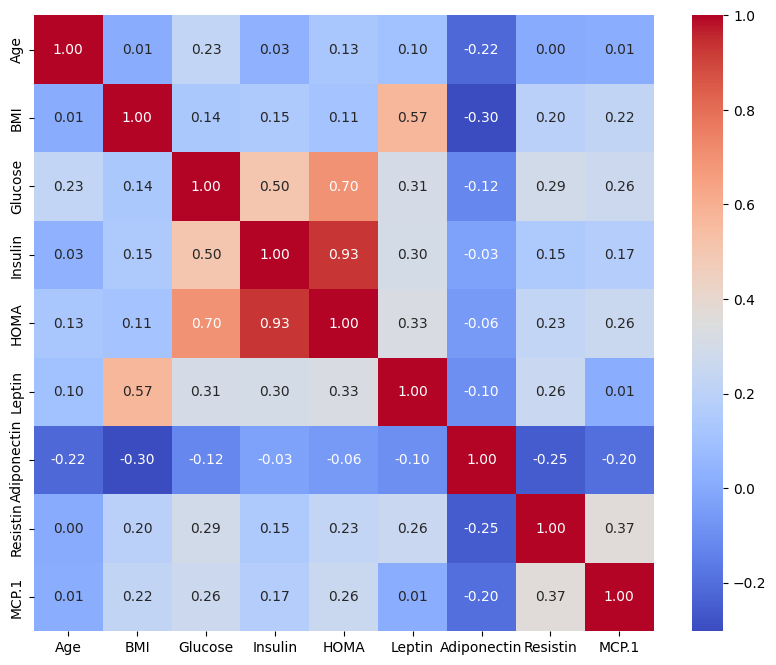

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(X_f.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

A correlação é uma medida de quão forte é a relação entre duas variáveis. Um valor de correlação de 0 indica que não há relação entre as variáveis, um valor de 1 indica uma correlação positiva perfeita e um valor de -1 indica uma correlação negativa perfeita.

A matriz de correlação acima apresenta:

HOMA e insulina tem forte correlação de 0,93.

Vale resaltar que HOMA é um indice de medida que aparece no resultado do exame de sangue que serve para avaliar a resistência à insulina (HOMA-IR) e atividade do pâncreas (HOMA-BETA). Sendo assim, obviamente tem relação com a insulina pois o aumento da insulina pode estar associado a algum tipo de câncer.

In [ ]:
coords = {
    'features':['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin', 'MCP.1']
}

In [ ]:
with pm.Model(coords = coords) as model_1:
  betas = pm.Normal("beta",0,1,dims = "features")
  alpha = pm.Normal("alpha",0,1)

  X = [
      pm.MutableData("X_"+column,X_train[column].values)
      for column in X_train.columns if np.issubdtype(X_f[column].dtype, np.number)
  ]

  y = pm.MutableData("y",y_train)

  mu = alpha + tt.dot(betas,X)
  likelihood = pm.Bernoulli("likelihood", pm.math.invlogit(mu), observed = y)

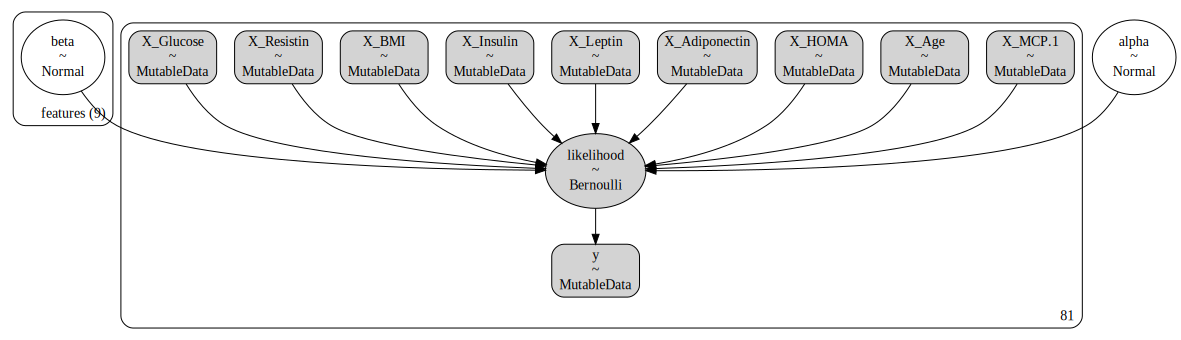

In [ ]:
pm.model_to_graphviz(model_1)

In [ ]:
with model_1:
  approx = pm.fit(20000)

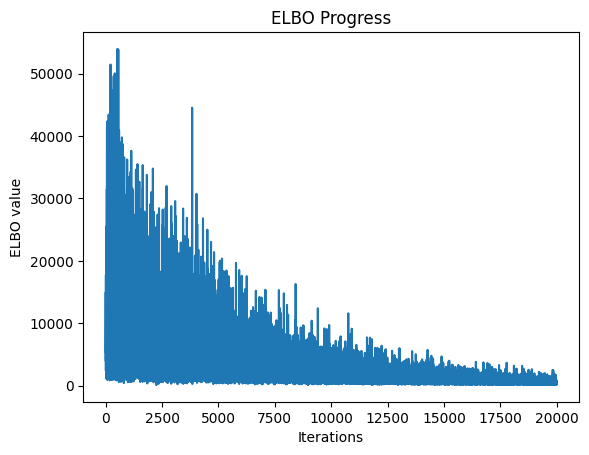

In [ ]:
plt.plot(approx.hist)
plt.title('ELBO Progress')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

In [ ]:
with model_1:
  trace = approx.sample(20000)

In [ ]:
pm.summary(trace)

Shape validation failed: input_shape: (1, 20000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[Age],-0.233,0.141,-0.498,0.030,0.001,0.001,19637.0,19632.0,NaN
beta[BMI],-0.435,0.256,-0.915,0.046,0.002,0.001,19265.0,19590.0,NaN
beta[Glucose],0.208,0.094,0.030,0.385,0.001,0.000,19266.0,20044.0,NaN
beta[Insulin],0.896,0.395,0.164,1.650,0.003,0.002,19681.0,19073.0,NaN
beta[HOMA],1.391,0.608,0.232,2.511,0.004,0.003,19255.0,19264.0,NaN
beta[Leptin],-0.293,0.215,-0.688,0.115,0.002,0.001,19948.0,19592.0,NaN
beta[Adiponectin],-0.296,0.358,-0.966,0.379,0.003,0.002,19498.0,19578.0,NaN
beta[Resistin],0.835,0.360,0.149,1.502,0.003,0.002,19728.0,19878.0,NaN
beta[MCP.1],-0.002,0.018,-0.035,0.031,0.000,0.000,19208.0,19199.0,NaN
alpha,-0.304,0.695,-1.617,0.987,0.005,0.004,19545.0,19092.0,NaN


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>]], dtype=object)

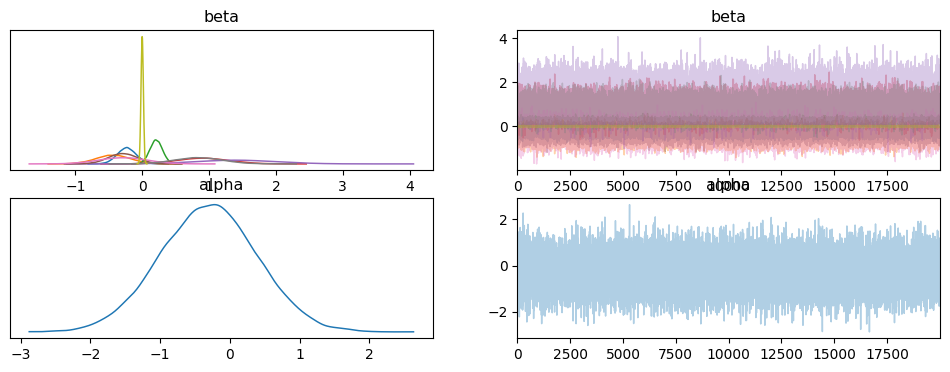

In [ ]:
az.plot_trace(trace)

A partir dos gráficos, pode-se notar que beta[HOMA] e beta[Insulin] e estão fortemente correlacionados com possivel câncer.

In [ ]:
vars = {"X_"+column : X_test[column].values
    for column in X_test.columns if np.issubdtype(X_test[column].dtype, np.number)}
vars["y"] = y_test

In [ ]:
with model_1:
  pm.set_data(vars)
  trace_post = pm.sample_posterior_predictive(trace)

In [ ]:
trace_post

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

In [ ]:
mean_likelihood = trace_post.posterior_predictive['likelihood'].mean(dim=['chain', 'draw'])
binary_predictions = (mean_likelihood > 0.5).astype(int)

In [ ]:
abs_diff = np.abs(y_test - binary_predictions)

df = pd.DataFrame({
    'Insulin': X_test['Insulin'],
    'y_test': y_test,
    'binary_predictions': binary_predictions,
    'abs_diff': abs_diff
})

df

,Insulin,y_test,binary_predictions,abs_diff
52,13.852,1,1,0
41,14.070,0,0,0
14,5.782,0,1,1
15,7.553,0,1,1
18,4.427,0,0,0
28,6.817,0,1,1
58,4.364,1,1,0
88,12.162,1,1,0
22,5.810,0,1,1
42,5.197,0,0,0


In [ ]:
errors = df["abs_diff"].sum()
acc = (len(df)-errors)/len(df)
print(f"Acuracia: {acc:.4f}")
print(f"Erros: {errors}")

Acuracia: 0.6571
Erros: 12


In [ ]:
class1 = df["y_test"].sum()
class0 = len(df)-class1

print(f"Classe 0: {class0}")
print(f"Classe 1: {class1}")

Classe 0: 20
Classe 1: 15


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, binary_predictions)

recall = recall_score(y_test, binary_predictions)

f1 = f1_score(y_test, binary_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.5882
Recall: 0.6667
F1 Score: 0.6250


In [ ]:
df[df["abs_diff"] == 1]

,Insulin,y_test,binary_predictions,abs_diff
14,5.782,0,1,1
15,7.553,0,1,1
28,6.817,0,1,1
22,5.810,0,1,1
113,5.730,1,0,1
38,5.138,0,1,1
37,5.646,0,1,1
112,4.530,1,0,1
110,11.910,1,0,1
33,23.194,0,1,1


Ao avaliar o desempenho de um modelo de regressão logística, a acurácia e o erro são duas métricas importantes a serem consideradas. A acurácia indica a proporção de previsões corretas, enquanto o erro indica a proporção de previsões incorretas.

Análise da acurácia:

No caso acima, a acurácia do modelo de regressão logística é de 62,86%, o que significa que ele classificou corretamente 65,71% dos exemplos. Este é um resultado ruim, pois o ideal seria acima de 90%.

Análise do erro:

O modelo fez 12 erros, o que significa que ele classificou incorretamente 12 dos exemplos.